<a href="https://colab.research.google.com/github/cloudy9982/SCADA-data-analyze/blob/main/SCADA_data_%E5%89%8D%E7%BD%AE%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##前置處理

In [ ]:
%pip install ruptures
%pip install changefinder
from google.colab import drive
import os
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 10.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 8.7 MB/s 
  Created wheel for changefinder: filename=changefinder-0.3-py3-none-any.whl size=3841 sha256=b16bde1100631da31423769b18284c9f0d4ac49aebd997820dba7fd767891811
  Stored in directory: /root/.cache/pip/wheels/48/8f/4c/ba040e4cad3dbf0409c5c38ac9d3f92f947ea490412cdf3400
Successfully built changefinder
Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/專題/EDPR風機資料/signal') 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import ruptures as rpt
import pandas as pd
import numpy as np
from google.colab import files
import csv
from datetime import datetime
import time
import io
import changefinder
import sys
import datetime
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets

##T01

In [ ]:
data1 = pd.read_excel('./T01.xlsx')

KeyboardInterrupt: ignored

In [ ]:
# import re
# time = list(data['Timestamp'])
# excel_file = Workbook()
# sheet = excel_file.active 
# sheet['A1'] = 'Time'
# for timeString in time:
#   times = timeString[:19]
#   times = re.sub('T',' ',times)
#   sheet.append([times])
# excel_file.save('output.xlsx')

#### 單變量偵測

In [ ]:
points = np.array(data1['Gear_Bear_Temp_Avg'])
points = points[:10000]

In [ ]:
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

In [ ]:
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

In [ ]:
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

In [ ]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=100).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

In [ ]:
#CHANGEFINDER PACKAGE
f, (ax1, ax2) = plt.subplots(2, 1)
f.subplots_adjust(hspace=0.4)
ax1.plot(points)
ax1.set_title("data point")
#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
ax2.plot(scores)
ax2.set_title("anomaly score")
plt.show() 

#### 多變量偵測

##### Window-based change point detection

一天的資料量是是144筆

In [ ]:
gear_bear_temp_avg = np.array(data1['Gear_Bear_Temp_Avg'])
gear_oil_temp_avg = np.array(data1['Gear_Oil_Temp_Avg'])
gen_rpm_avg = np.array(data1['Gen_RPM_Avg'])
gen_rpm_max = np.array(data1['Gen_RPM_Max'])
gen_rpm_min = np.array(data1['Gen_RPM_Min'])
gen_rpm_std = np.array(data1['Gen_RPM_Std'])
gen_phase1_temp_avg = np.array(data1['Gen_Phase1_Temp_Avg'])
gen_phase2_temp_avg = np.array(data1['Gen_Phase2_Temp_Avg'])
gen_phase3_temp_avg = np.array(data1['Gen_Phase3_Temp_Avg'])
hyd_oil_temp_avg = np.array(data1['Hyd_Oil_Temp_Avg'])
gear_oil_temp_avg = np.array(data1['Gear_Oil_Temp_Avg'])
gear_bear_temp_avg = np.array(data1['Gear_Bear_Temp_Avg'])
nac_remp_avg = np.array(data1['Nac_Temp_Avg'])
rtr_rpm_max = np.array(data1['Rtr_RPM_Max'])
rtr_rpm_min = np.array(data1['Rtr_RPM_Min'])
rtr_rpm_avg = np.array(data1['Rtr_RPM_Avg'])
amb_windspeed_max = np.array(data1['Amb_WindSpeed_Max'])
amb_windspeed_min = np.array(data1['Amb_WindSpeed_Min'])
amb_windspeed_avg = np.array(data1['Amb_WindSpeed_Avg'])
amb_windspeed_std = np.array(data1['Amb_WindSpeed_Std'])
amb_winddir_relative_avg = np.array(data1['Amb_WindDir_Relative_Avg'])
amb_winddir_abs_avg = np.array(data1['Amb_WindDir_Abs_Avg'])
amb_temp_avg = np.array(data1['Amb_Temp_Avg'])
prod_latestavg_actpwrgen0 = np.array(data1['Prod_LatestAvg_ActPwrGen0'])
prod_latestavg_actpwrgen1 = np.array(data1['Prod_LatestAvg_ActPwrGen1'])
prod_latestavg_actpwrgen2 = np.array(data1['Prod_LatestAvg_ActPwrGen2'])
prod_latestavg_totactpwr = np.array(data1['Prod_LatestAvg_TotActPwr'])
prod_latestavg_reactpwrgen0 = np.array(data1['Prod_LatestAvg_ReactPwrGen0'])
prod_latestavg_reactpwrgen1 = np.array(data1['Prod_LatestAvg_ReactPwrGen1'])
prod_latestavg_reactpwrgen2 = np.array(data1['Prod_LatestAvg_ReactPwrGen2'])
prod_latestavg_totreactpwr = np.array(data1['Prod_LatestAvg_TotReactPwr'])
hvtrafo_phase1_temp_avg = np.array(data1['HVTrafo_Phase1_Temp_Avg'])
hvtrafo_phase2_temp_avg = np.array(data1['HVTrafo_Phase2_Temp_Avg'])
hvtrafo_phase3_temp_avg = np.array(data1['HVTrafo_Phase3_Temp_Avg'])
grd_inverterphase1_temp_avg = np.array(data1['Grd_InverterPhase1_Temp_Avg'])
cont_top_temp_avg = np.array(data1['Cont_Top_Temp_Avg'])
cont_hub_temp_avg = np.array(data1['Cont_Hub_Temp_Avg'])
cont_vcp_temp_avg = np.array(data1['Cont_VCP_Temp_Avg'])
gen_slipring_temp_avg = np.array(data1['Gen_SlipRing_Temp_Avg'])
spin_temp_avg = np.array(data1['Spin_Temp_Avg'])
blds_pitchangle_min = np.array(data1['Blds_PitchAngle_Min'])
blds_pitchangle_max = np.array(data1['Blds_PitchAngle_Max'])
blds_pitchangle_std = np.array(data1['Blds_PitchAngle_Std'])
blds_pitchangle_avg = np.array(data1['Blds_PitchAngle_Avg'])
cont_vcp_chokcoiltemp_avg = np.array(data1['Cont_VCP_ChokcoilTemp_Avg'])
grd_rtrinvphase1_temp_avg = np.array(data1['Grd_RtrInvPhase1_Temp_Avg'])
grd_rtrinvphase2_temp_avg = np.array(data1['Grd_RtrInvPhase2_Temp_Avg'])
grd_rtrinvphase3_temp_avg = np.array(data1['Grd_RtrInvPhase3_Temp_Avg'])
cont_vcp_wtrtemp_avg = np.array(data1['Cont_VCP_WtrTemp_Avg'])
grd_prod_pwr_avg = np.array(data1['Grd_Prod_Pwr_Avg'])
grd_prod_cosphi_avg = np.array(data1['Grd_Prod_CosPhi_Avg'])
grd_prod_freq_avg = np.array(data1['Grd_Prod_Freq_Avg'])
grd_prod_voltphse1_avg = np.array(data1['Grd_Prod_VoltPhse1_Avg'])
grd_prod_voltphse2_avg = np.array(data1['Grd_Prod_VoltPhse2_Avg'])
grd_prod_voltphse3_avg = np.array(data1['Grd_Prod_VoltPhse3_Avg'])
grd_prod_curphse1_avg = np.array(data1['Grd_Prod_CurPhse1_Avg'])
grd_prod_curphse2_avg = np.array(data1['Grd_Prod_CurPhse2_Avg'])
grd_prod_curphse3_avg = np.array(data1['Grd_Prod_CurPhse3_Avg'])
grd_prod_pwr_max = np.array(data1['Grd_Prod_Pwr_Max'])
grd_prod_pwr_min = np.array(data1['Grd_Prod_Pwr_Min'])
Grd_Busbar_Temp_Avg = np.array(data1['Grd_Busbar_Temp_Avg'])
rtr_rpm_std = np.array(data1['Rtr_RPM_Std'])
amb_windspeed_est_avg = np.array(data1['Amb_WindSpeed_Est_Avg'])
grd_prod_pwr_std = np.array(data1['Grd_Prod_Pwr_Std'])
grd_prod_reactpwr_avg = np.array(data1['Grd_Prod_ReactPwr_Avg'])
grd_prod_reactpwr_max = np.array(data1['Grd_Prod_ReactPwr_Max'])
grd_prod_reactpwr_min = np.array(data1['Grd_Prod_ReactPwr_Min'])
grd_prod_reactpwr_std = np.array(data1['Grd_Prod_ReactPwr_Std'])
grd_prod_psblepwr_avg = np.array(data1['Grd_Prod_PsblePwr_Avg'])
grd_prod_psblepwr_max = np.array(data1['Grd_Prod_PsblePwr_Max'])
grd_prod_psblepwr_min = np.array(data1['Grd_Prod_PsblePwr_Min'])
grd_prod_psblepwr_std = np.array(data1['Grd_Prod_PsblePwr_Std'])
grd_prod_psbleind_avg = np.array(data1['Grd_Prod_PsbleInd_Avg'])
grd_prod_psbleind_max = np.array(data1['Grd_Prod_PsbleInd_Max'])
grd_prod_psbleind_min = np.array(data1['Grd_Prod_PsbleInd_Min'])
grd_prod_psbleind_std = np.array(data1['Grd_Prod_PsbleInd_Std'])
grd_prod_psblecap_avg = np.array(data1['Grd_Prod_PsbleCap_Avg'])
grd_prod_psblecap_max = np.array(data1['Grd_Prod_PsbleCap_Max'])
grd_prod_psblecap_min = np.array(data1['Grd_Prod_PsbleCap_Min'])
grd_prod_psblecap_std = np.array(data1['Grd_Prod_PsbleCap_Std'])
gen_bear2_temp_avg = np.array(data1['Gen_Bear2_Temp_Avg'])
nac_direction_avg = np.array(data1['Nac_Direction_Avg'])

#####3dim

gear_bear_temp_avg,

gear_oil_temp_avg,

gen_rpm_avg

#####2016.5~9月

In [ ]:
signal = np.vstack([gear_bear_temp_avg[144*151:144*273],gear_oil_temp_avg[144*151:144*273],gen_rpm_avg[144*151:144*273]]).T

In [ ]:
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( signal ) # Data 為原始資料

In [ ]:
point_length,dim,sigma = 144*153,3,5

model = "linear"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(MinMax_Data, my_bkps, [144*48],figsize=(10, 6))
plt.xlabel("nomalization")

# detection
point_length,dim,sigma = 144*153,3,5

model = "linear"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*48],figsize=(10, 6))
plt.xlabel("no nomalization")

#####2016.1~9月

In [ ]:
signal = np.vstack([gear_bear_temp_avg[:144*273],gear_oil_temp_avg[:144*273],gen_rpm_avg[:144*273]]).T

In [ ]:
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( signal ) # Data 為原始資料

In [ ]:
# detection
point_length,dim,sigma = 144*273,3,5

model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(MinMax_Data, my_bkps, [144*199],figsize=(10, 6))
#rpt.show.display(signal, my_bkps, figsize=(10, 6))
plt.xlabel("nomalization")


# detection
point_length,dim,sigma = 144*273,3,5

model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*199],figsize=(10, 6))
#rpt.show.display(signal, my_bkps, figsize=(10, 6))
plt.xlabel("no nomalization")


#####2016-2017

In [ ]:
signal = np.vstack([gear_bear_temp_avg,gear_oil_temp_avg,gen_rpm_avg]).T

In [ ]:
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( signal ) # Data 為原始資料

In [ ]:
point_length,dim,sigma = 104684,3,5

model = "l1"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=2,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(MinMax_Data, my_bkps, [144*199,144*589],figsize=(10, 6))
#rpt.show.display(signal, my_bkps, figsize=(10, 6))
plt.xlabel("nomalization")

point_length,dim,sigma = 104684,3,5

model = "l1"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=2,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*200,144*589],figsize=(10, 6))
plt.xlabel("no nomalization")

##### 55dim

2016.5-9

In [ ]:
signal = np.vstack([gear_bear_temp_avg[144*151:144*273],gear_oil_temp_avg[144*151:144*273],gen_rpm_avg[144*151:144*273],gen_rpm_max[144*151:144*273],gen_rpm_min[144*151:144*273],gen_rpm_std[144*151:144*273],gen_phase1_temp_avg[144*151:144*273],gen_phase2_temp_avg[144*151:144*273],gen_phase3_temp_avg[144*151:144*273],hyd_oil_temp_avg[144*151:144*273],gear_oil_temp_avg[144*151:144*273],gear_bear_temp_avg[144*151:144*273],nac_remp_avg[144*151:144*273],rtr_rpm_max[144*151:144*273],rtr_rpm_min[144*151:144*273],rtr_rpm_avg[144*151:144*273],amb_windspeed_max[144*151:144*273],amb_windspeed_min[144*151:144*273],amb_windspeed_std[144*151:144*273],amb_windspeed_avg[144*151:144*273],amb_winddir_relative_avg[144*151:144*273],amb_winddir_abs_avg[144*151:144*273],amb_temp_avg[144*151:144*273],prod_latestavg_actpwrgen0[144*151:144*273],prod_latestavg_actpwrgen1[144*151:144*273],prod_latestavg_actpwrgen2[144*151:144*273],prod_latestavg_totactpwr[144*151:144*273],prod_latestavg_reactpwrgen0[144*151:144*273],prod_latestavg_reactpwrgen1[144*151:144*273],prod_latestavg_reactpwrgen2[144*151:144*273],prod_latestavg_totreactpwr[144*151:144*273],hvtrafo_phase1_temp_avg[144*151:144*273],hvtrafo_phase2_temp_avg[144*151:144*273],hvtrafo_phase3_temp_avg[144*151:144*273],grd_inverterphase1_temp_avg[144*151:144*273],cont_top_temp_avg[144*151:144*273],cont_hub_temp_avg[144*151:144*273],cont_vcp_temp_avg[144*151:144*273],gen_slipring_temp_avg[144*151:144*273],spin_temp_avg[144*151:144*273],blds_pitchangle_min[144*151:144*273],blds_pitchangle_max[144*151:144*273],blds_pitchangle_std[144*151:144*273],blds_pitchangle_avg[144*151:144*273],cont_vcp_chokcoiltemp_avg[144*151:144*273],grd_rtrinvphase1_temp_avg[144*151:144*273],grd_rtrinvphase2_temp_avg[144*151:144*273],grd_rtrinvphase3_temp_avg[144*151:144*273],cont_vcp_wtrtemp_avg[144*151:144*273],grd_prod_pwr_avg[144*151:144*273],grd_prod_cosphi_avg[144*151:144*273],grd_prod_freq_avg[144*151:144*273],grd_prod_voltphse1_avg[144*151:144*273],grd_prod_voltphse2_avg[144*151:144*273],grd_prod_voltphse3_avg[144*151:144*273],grd_prod_curphse1_avg[144*151:144*273],grd_prod_curphse2_avg[144*151:144*273],grd_prod_curphse3_avg[144*151:144*273],grd_prod_pwr_max[144*151:144*273],grd_prod_pwr_min[144*151:144*273],Grd_Busbar_Temp_Avg[144*151:144*273],rtr_rpm_std[144*151:144*273],amb_windspeed_est_avg[144*151:144*273],grd_prod_pwr_std[144*151:144*273],grd_prod_reactpwr_avg[144*151:144*273],grd_prod_reactpwr_max[144*151:144*273],grd_prod_reactpwr_min[144*151:144*273],grd_prod_reactpwr_std[144*151:144*273],grd_prod_psblepwr_avg[144*151:144*273],grd_prod_psblepwr_max[144*151:144*273],grd_prod_psblepwr_min[144*151:144*273],grd_prod_psblepwr_std[144*151:144*273],grd_prod_psbleind_avg[144*151:144*273],grd_prod_psbleind_max[144*151:144*273],grd_prod_psbleind_min[144*151:144*273],grd_prod_psbleind_std[144*151:144*273],grd_prod_psblecap_avg[144*151:144*273],grd_prod_psblecap_max[144*151:144*273],grd_prod_psblecap_min[144*151:144*273],grd_prod_psblecap_std[144*151:144*273],gen_bear2_temp_avg[144*151:144*273],nac_direction_avg[144*151:144*273]]).T

In [ ]:
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( signal ) # Data 為原始資料

In [ ]:
point_length,dim,sigma = 144*122,55,5

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(MinMax_Data, my_bkps, [144*48])
#rpt.show.display(signal, my_bkps, figsize=(10, 6))
plt.xlabel("nomalization")

point_length,dim,sigma = 144*122,55,5

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*48])
#rpt.show.display(signal, my_bkps, figsize=(10, 6))
plt.xlabel("no nomalization")

In [ ]:
signal = np.vstack([gear_bear_temp_avg,gear_oil_temp_avg,gen_rpm_avg,gen_rpm_max,gen_rpm_min,gen_rpm_std,gen_phase1_temp_avg,gen_phase2_temp_avg,gen_phase3_temp_avg,hyd_oil_temp_avg,gear_oil_temp_avg,gear_bear_temp_avg,nac_remp_avg,rtr_rpm_max,rtr_rpm_min,rtr_rpm_avg,amb_windspeed_max,amb_windspeed_min,amb_windspeed_std,amb_windspeed_avg,amb_winddir_relative_avg,amb_winddir_abs_avg,amb_temp_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,prod_latestavg_totactpwr,prod_latestavg_reactpwrgen0,prod_latestavg_reactpwrgen1,prod_latestavg_reactpwrgen2,prod_latestavg_totreactpwr,hvtrafo_phase1_temp_avg,hvtrafo_phase2_temp_avg,hvtrafo_phase3_temp_avg,grd_inverterphase1_temp_avg,cont_top_temp_avg,cont_hub_temp_avg,cont_vcp_temp_avg,gen_slipring_temp_avg,spin_temp_avg,blds_pitchangle_min,blds_pitchangle_max,blds_pitchangle_std,blds_pitchangle_avg,cont_vcp_chokcoiltemp_avg,grd_rtrinvphase1_temp_avg,grd_rtrinvphase2_temp_avg,grd_rtrinvphase3_temp_avg,cont_vcp_wtrtemp_avg,grd_prod_pwr_avg,grd_prod_cosphi_avg,grd_prod_freq_avg,grd_prod_voltphse1_avg,grd_prod_voltphse2_avg,grd_prod_voltphse3_avg,grd_prod_curphse1_avg,grd_prod_curphse2_avg,grd_prod_curphse3_avg,grd_prod_pwr_max,grd_prod_pwr_min,Grd_Busbar_Temp_Avg,rtr_rpm_std,amb_windspeed_est_avg,grd_prod_pwr_std,grd_prod_reactpwr_avg,grd_prod_reactpwr_max,grd_prod_reactpwr_min,grd_prod_reactpwr_std,grd_prod_psblepwr_avg,grd_prod_psblepwr_max,grd_prod_psblepwr_min,grd_prod_psblepwr_std,grd_prod_psbleind_avg,grd_prod_psbleind_max,grd_prod_psbleind_min,grd_prod_psbleind_std,grd_prod_psblecap_avg,grd_prod_psblecap_max,grd_prod_psblecap_min,grd_prod_psblecap_std,gen_bear2_temp_avg,nac_direction_avg]).T

In [ ]:
point_length,dim,sigma = 104684,55,5

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=2,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*199,144*590])
plt.xlabel("point_length")

##T06

####參數

In [ ]:
data6 = pd.read_excel('./T06.xlsx')

In [ ]:
gear_bear_temp_avg = np.array(data6['Gear_Bear_Temp_Avg'])
gear_oil_temp_avg = np.array(data6['Gear_Oil_Temp_Avg'])
gen_rpm_avg = np.array(data6['Gen_RPM_Avg'])
gen_rpm_max = np.array(data6['Gen_RPM_Max'])
gen_rpm_min = np.array(data6['Gen_RPM_Min'])
gen_rpm_std = np.array(data6['Gen_RPM_Std'])
gen_phase1_temp_avg = np.array(data6['Gen_Phase1_Temp_Avg'])
gen_phase2_temp_avg = np.array(data6['Gen_Phase2_Temp_Avg'])
gen_phase3_temp_avg = np.array(data6['Gen_Phase3_Temp_Avg'])
hyd_oil_temp_avg = np.array(data6['Hyd_Oil_Temp_Avg'])
gear_oil_temp_avg = np.array(data6['Gear_Oil_Temp_Avg'])
gear_bear_temp_avg = np.array(data6['Gear_Bear_Temp_Avg'])
nac_remp_avg = np.array(data6['Nac_Temp_Avg'])
rtr_rpm_max = np.array(data6['Rtr_RPM_Max'])
rtr_rpm_min = np.array(data6['Rtr_RPM_Min'])
rtr_rpm_avg = np.array(data6['Rtr_RPM_Avg'])
amb_windspeed_max = np.array(data6['Amb_WindSpeed_Max'])
amb_windspeed_min = np.array(data6['Amb_WindSpeed_Min'])
amb_windspeed_avg = np.array(data6['Amb_WindSpeed_Avg'])
amb_windspeed_std = np.array(data6['Amb_WindSpeed_Std'])
amb_winddir_relative_avg = np.array(data6['Amb_WindDir_Relative_Avg'])
amb_winddir_abs_avg = np.array(data6['Amb_WindDir_Abs_Avg'])
amb_temp_avg = np.array(data6['Amb_Temp_Avg'])
prod_latestavg_actpwrgen0 = np.array(data6['Prod_LatestAvg_ActPwrGen0'])
prod_latestavg_actpwrgen1 = np.array(data6['Prod_LatestAvg_ActPwrGen1'])
prod_latestavg_actpwrgen2 = np.array(data6['Prod_LatestAvg_ActPwrGen2'])
prod_latestavg_totactpwr = np.array(data6['Prod_LatestAvg_TotActPwr'])
prod_latestavg_reactpwrgen0 = np.array(data6['Prod_LatestAvg_ReactPwrGen0'])
prod_latestavg_reactpwrgen1 = np.array(data6['Prod_LatestAvg_ReactPwrGen1'])
prod_latestavg_reactpwrgen2 = np.array(data6['Prod_LatestAvg_ReactPwrGen2'])
prod_latestavg_totreactpwr = np.array(data6['Prod_LatestAvg_TotReactPwr'])
hvtrafo_phase1_temp_avg = np.array(data6['HVTrafo_Phase1_Temp_Avg'])
hvtrafo_phase2_temp_avg = np.array(data6['HVTrafo_Phase2_Temp_Avg'])
hvtrafo_phase3_temp_avg = np.array(data6['HVTrafo_Phase3_Temp_Avg'])
grd_inverterphase1_temp_avg = np.array(data6['Grd_InverterPhase1_Temp_Avg'])
cont_top_temp_avg = np.array(data6['Cont_Top_Temp_Avg'])
cont_hub_temp_avg = np.array(data6['Cont_Hub_Temp_Avg'])
cont_vcp_temp_avg = np.array(data6['Cont_VCP_Temp_Avg'])
gen_slipring_temp_avg = np.array(data6['Gen_SlipRing_Temp_Avg'])
spin_temp_avg = np.array(data6['Spin_Temp_Avg'])
blds_pitchangle_min = np.array(data6['Blds_PitchAngle_Min'])
blds_pitchangle_max = np.array(data6['Blds_PitchAngle_Max'])
blds_pitchangle_std = np.array(data6['Blds_PitchAngle_Std'])
blds_pitchangle_avg = np.array(data6['Blds_PitchAngle_Avg'])
cont_vcp_chokcoiltemp_avg = np.array(data6['Cont_VCP_ChokcoilTemp_Avg'])
grd_rtrinvphase1_temp_avg = np.array(data6['Grd_RtrInvPhase1_Temp_Avg'])
grd_rtrinvphase2_temp_avg = np.array(data6['Grd_RtrInvPhase2_Temp_Avg'])
grd_rtrinvphase3_temp_avg = np.array(data6['Grd_RtrInvPhase3_Temp_Avg'])
cont_vcp_wtrtemp_avg = np.array(data6['Cont_VCP_WtrTemp_Avg'])
grd_prod_pwr_avg = np.array(data6['Grd_Prod_Pwr_Avg'])
grd_prod_cosphi_avg = np.array(data6['Grd_Prod_CosPhi_Avg'])
grd_prod_freq_avg = np.array(data6['Grd_Prod_Freq_Avg'])
grd_prod_voltphse1_avg = np.array(data6['Grd_Prod_VoltPhse1_Avg'])
grd_prod_voltphse2_avg = np.array(data6['Grd_Prod_VoltPhse2_Avg'])
grd_prod_voltphse3_avg = np.array(data6['Grd_Prod_VoltPhse3_Avg'])
grd_prod_curphse1_avg = np.array(data6['Grd_Prod_CurPhse1_Avg'])
grd_prod_curphse2_avg = np.array(data6['Grd_Prod_CurPhse2_Avg'])
grd_prod_curphse3_avg = np.array(data6['Grd_Prod_CurPhse3_Avg'])
grd_prod_pwr_max = np.array(data6['Grd_Prod_Pwr_Max'])
grd_prod_pwr_min = np.array(data6['Grd_Prod_Pwr_Min'])
Grd_Busbar_Temp_Avg = np.array(data6['Grd_Busbar_Temp_Avg'])
rtr_rpm_std = np.array(data6['Rtr_RPM_Std'])
amb_windspeed_est_avg = np.array(data6['Amb_WindSpeed_Est_Avg'])
grd_prod_pwr_std = np.array(data6['Grd_Prod_Pwr_Std'])
grd_prod_reactpwr_avg = np.array(data6['Grd_Prod_ReactPwr_Avg'])
grd_prod_reactpwr_max = np.array(data6['Grd_Prod_ReactPwr_Max'])
grd_prod_reactpwr_min = np.array(data6['Grd_Prod_ReactPwr_Min'])
grd_prod_reactpwr_std = np.array(data6['Grd_Prod_ReactPwr_Std'])
grd_prod_psblepwr_avg = np.array(data6['Grd_Prod_PsblePwr_Avg'])
grd_prod_psblepwr_max = np.array(data6['Grd_Prod_PsblePwr_Max'])
grd_prod_psblepwr_min = np.array(data6['Grd_Prod_PsblePwr_Min'])
grd_prod_psblepwr_std = np.array(data6['Grd_Prod_PsblePwr_Std'])
grd_prod_psbleind_avg = np.array(data6['Grd_Prod_PsbleInd_Avg'])
grd_prod_psbleind_max = np.array(data6['Grd_Prod_PsbleInd_Max'])
grd_prod_psbleind_min = np.array(data6['Grd_Prod_PsbleInd_Min'])
grd_prod_psbleind_std = np.array(data6['Grd_Prod_PsbleInd_Std'])
grd_prod_psblecap_avg = np.array(data6['Grd_Prod_PsbleCap_Avg'])
grd_prod_psblecap_max = np.array(data6['Grd_Prod_PsbleCap_Max'])
grd_prod_psblecap_min = np.array(data6['Grd_Prod_PsbleCap_Min'])
grd_prod_psblecap_std = np.array(data6['Grd_Prod_PsbleCap_Std'])
gen_bear2_temp_avg = np.array(data6['Gen_Bear2_Temp_Avg'])
nac_direction_avg = np.array(data6['Nac_Direction_Avg'])

#### Window-based change point detection 55dim

2016.5-9

In [ ]:
signal = np.vstack([gear_bear_temp_avg[144*151:144*273],gear_oil_temp_avg[144*151:144*273],gen_rpm_avg[144*151:144*273],gen_rpm_max[144*151:144*273],gen_rpm_min[144*151:144*273],gen_rpm_std[144*151:144*273],gen_phase1_temp_avg[144*151:144*273],gen_phase2_temp_avg[144*151:144*273],gen_phase3_temp_avg[144*151:144*273],hyd_oil_temp_avg[144*151:144*273],gear_oil_temp_avg[144*151:144*273],gear_bear_temp_avg[144*151:144*273],nac_remp_avg[144*151:144*273],rtr_rpm_max[144*151:144*273],rtr_rpm_min[144*151:144*273],rtr_rpm_avg[144*151:144*273],amb_windspeed_max[144*151:144*273],amb_windspeed_min[144*151:144*273],amb_windspeed_std[144*151:144*273],amb_windspeed_avg[144*151:144*273],amb_winddir_relative_avg[144*151:144*273],amb_winddir_abs_avg[144*151:144*273],amb_temp_avg[144*151:144*273],prod_latestavg_actpwrgen0[144*151:144*273],prod_latestavg_actpwrgen1[144*151:144*273],prod_latestavg_actpwrgen2[144*151:144*273],prod_latestavg_totactpwr[144*151:144*273],prod_latestavg_reactpwrgen0[144*151:144*273],prod_latestavg_reactpwrgen1[144*151:144*273],prod_latestavg_reactpwrgen2[144*151:144*273],prod_latestavg_totreactpwr[144*151:144*273],hvtrafo_phase1_temp_avg[144*151:144*273],hvtrafo_phase2_temp_avg[144*151:144*273],hvtrafo_phase3_temp_avg[144*151:144*273],grd_inverterphase1_temp_avg[144*151:144*273],cont_top_temp_avg[144*151:144*273],cont_hub_temp_avg[144*151:144*273],cont_vcp_temp_avg[144*151:144*273],gen_slipring_temp_avg[144*151:144*273],spin_temp_avg[144*151:144*273],blds_pitchangle_min[144*151:144*273],blds_pitchangle_max[144*151:144*273],blds_pitchangle_std[144*151:144*273],blds_pitchangle_avg[144*151:144*273],cont_vcp_chokcoiltemp_avg[144*151:144*273],grd_rtrinvphase1_temp_avg[144*151:144*273],grd_rtrinvphase2_temp_avg[144*151:144*273],grd_rtrinvphase3_temp_avg[144*151:144*273],cont_vcp_wtrtemp_avg[144*151:144*273],grd_prod_pwr_avg[144*151:144*273],grd_prod_cosphi_avg[144*151:144*273],grd_prod_freq_avg[144*151:144*273],grd_prod_voltphse1_avg[144*151:144*273],grd_prod_voltphse2_avg[144*151:144*273],grd_prod_voltphse3_avg[144*151:144*273],grd_prod_curphse1_avg[144*151:144*273],grd_prod_curphse2_avg[144*151:144*273],grd_prod_curphse3_avg[144*151:144*273],grd_prod_pwr_max[144*151:144*273],grd_prod_pwr_min[144*151:144*273],Grd_Busbar_Temp_Avg[144*151:144*273],rtr_rpm_std[144*151:144*273],amb_windspeed_est_avg[144*151:144*273],grd_prod_pwr_std[144*151:144*273],grd_prod_reactpwr_avg[144*151:144*273],grd_prod_reactpwr_max[144*151:144*273],grd_prod_reactpwr_min[144*151:144*273],grd_prod_reactpwr_std[144*151:144*273],grd_prod_psblepwr_avg[144*151:144*273],grd_prod_psblepwr_max[144*151:144*273],grd_prod_psblepwr_min[144*151:144*273],grd_prod_psblepwr_std[144*151:144*273],grd_prod_psbleind_avg[144*151:144*273],grd_prod_psbleind_max[144*151:144*273],grd_prod_psbleind_min[144*151:144*273],grd_prod_psbleind_std[144*151:144*273],grd_prod_psblecap_avg[144*151:144*273],grd_prod_psblecap_max[144*151:144*273],grd_prod_psblecap_min[144*151:144*273],grd_prod_psblecap_std[144*151:144*273],gen_bear2_temp_avg[144*151:144*273],nac_direction_avg[144*151:144*273]]).T

In [ ]:
point_length,dim,sigma = 144*122,55,5

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*48])
#rpt.show.display(signal, my_bkps, figsize=(10, 6))
plt.xlabel("point_length")

2016-2017

In [ ]:
signal = np.vstack([gear_bear_temp_avg,gear_oil_temp_avg,gen_rpm_avg,gen_rpm_max,gen_rpm_min,gen_rpm_std,gen_phase1_temp_avg,gen_phase2_temp_avg,gen_phase3_temp_avg,hyd_oil_temp_avg,gear_oil_temp_avg,gear_bear_temp_avg,nac_remp_avg,rtr_rpm_max,rtr_rpm_min,rtr_rpm_avg,amb_windspeed_max,amb_windspeed_min,amb_windspeed_std,amb_windspeed_avg,amb_winddir_relative_avg,amb_winddir_abs_avg,amb_temp_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,prod_latestavg_totactpwr,prod_latestavg_reactpwrgen0,prod_latestavg_reactpwrgen1,prod_latestavg_reactpwrgen2,prod_latestavg_totreactpwr,hvtrafo_phase1_temp_avg,hvtrafo_phase2_temp_avg,hvtrafo_phase3_temp_avg,grd_inverterphase1_temp_avg,cont_top_temp_avg,cont_hub_temp_avg,cont_vcp_temp_avg,gen_slipring_temp_avg,spin_temp_avg,blds_pitchangle_min,blds_pitchangle_max,blds_pitchangle_std,blds_pitchangle_avg,cont_vcp_chokcoiltemp_avg,grd_rtrinvphase1_temp_avg,grd_rtrinvphase2_temp_avg,grd_rtrinvphase3_temp_avg,cont_vcp_wtrtemp_avg,grd_prod_pwr_avg,grd_prod_cosphi_avg,grd_prod_freq_avg,grd_prod_voltphse1_avg,grd_prod_voltphse2_avg,grd_prod_voltphse3_avg,grd_prod_curphse1_avg,grd_prod_curphse2_avg,grd_prod_curphse3_avg,grd_prod_pwr_max,grd_prod_pwr_min,Grd_Busbar_Temp_Avg,rtr_rpm_std,amb_windspeed_est_avg,grd_prod_pwr_std,grd_prod_reactpwr_avg,grd_prod_reactpwr_max,grd_prod_reactpwr_min,grd_prod_reactpwr_std,grd_prod_psblepwr_avg,grd_prod_psblepwr_max,grd_prod_psblepwr_min,grd_prod_psblepwr_std,grd_prod_psbleind_avg,grd_prod_psbleind_max,grd_prod_psbleind_min,grd_prod_psbleind_std,grd_prod_psblecap_avg,grd_prod_psblecap_max,grd_prod_psblecap_min,grd_prod_psblecap_std,gen_bear2_temp_avg,nac_direction_avg]).T

In [ ]:
point_length,dim,sigma = 104684,55,5

model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=8,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*95,144*193,144*206,144*248,144*276,144*301,144*597,144*656])
plt.xlabel("point_length")

###genertator錯誤預測

In [ ]:
signal = np.vstack([gen_rpm_avg,gen_phase1_temp_avg,gen_phase2_temp_avg,gen_phase3_temp_avg,gen_bear2_temp_avg]).T

In [ ]:
point_length,dim,sigma = 104684,5,5

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=50,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*193,144*206,144*248,144*276,144*301])
plt.xlabel("point_length")

###HYDRAULIC_GROUP錯誤預測

In [ ]:
signal = np.vstack([hyd_oil_temp_avg]).T

In [ ]:
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=2,pen=np.log(point_length) * 1 * sigma ** 2)
rpt.show.display(signal, my_bkps,[144*95,144*597], figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

###gear box 錯誤

In [ ]:
signal = np.vstack([gear_bear_temp_avg,gear_oil_temp_avg,gen_rpm_avg]).T

In [ ]:
point_length,dim,sigma = 104684,3,5

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=1,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*656])
plt.xlabel("point_length")

## T07

#####參數

In [ ]:
data7 = pd.read_excel('./T07.xlsx')

In [ ]:
gear_bear_temp_avg = np.array(data7['Gear_Bear_Temp_Avg'])
gear_oil_temp_avg = np.array(data7['Gear_Oil_Temp_Avg'])
gen_rpm_avg = np.array(data7['Gen_RPM_Avg'])
gen_rpm_max = np.array(data7['Gen_RPM_Max'])
gen_rpm_min = np.array(data7['Gen_RPM_Min'])
gen_rpm_std = np.array(data7['Gen_RPM_Std'])
gen_phase1_temp_avg = np.array(data7['Gen_Phase1_Temp_Avg'])
gen_phase2_temp_avg = np.array(data7['Gen_Phase2_Temp_Avg'])
gen_phase3_temp_avg = np.array(data7['Gen_Phase3_Temp_Avg'])
hyd_oil_temp_avg = np.array(data7['Hyd_Oil_Temp_Avg'])
gear_oil_temp_avg = np.array(data7['Gear_Oil_Temp_Avg'])
gear_bear_temp_avg = np.array(data7['Gear_Bear_Temp_Avg'])
nac_remp_avg = np.array(data7['Nac_Temp_Avg'])
rtr_rpm_max = np.array(data7['Rtr_RPM_Max'])
rtr_rpm_min = np.array(data7['Rtr_RPM_Min'])
rtr_rpm_avg = np.array(data7['Rtr_RPM_Avg'])
amb_windspeed_max = np.array(data7['Amb_WindSpeed_Max'])
amb_windspeed_min = np.array(data7['Amb_WindSpeed_Min'])
amb_windspeed_avg = np.array(data7['Amb_WindSpeed_Avg'])
amb_windspeed_std = np.array(data7['Amb_WindSpeed_Std'])
amb_winddir_relative_avg = np.array(data7['Amb_WindDir_Relative_Avg'])
amb_winddir_abs_avg = np.array(data7['Amb_WindDir_Abs_Avg'])
amb_temp_avg = np.array(data7['Amb_Temp_Avg'])
prod_latestavg_actpwrgen0 = np.array(data7['Prod_LatestAvg_ActPwrGen0'])
prod_latestavg_actpwrgen1 = np.array(data7['Prod_LatestAvg_ActPwrGen1'])
prod_latestavg_actpwrgen2 = np.array(data7['Prod_LatestAvg_ActPwrGen2'])
prod_latestavg_totactpwr = np.array(data7['Prod_LatestAvg_TotActPwr'])
prod_latestavg_reactpwrgen0 = np.array(data7['Prod_LatestAvg_ReactPwrGen0'])
prod_latestavg_reactpwrgen1 = np.array(data7['Prod_LatestAvg_ReactPwrGen1'])
prod_latestavg_reactpwrgen2 = np.array(data7['Prod_LatestAvg_ReactPwrGen2'])
prod_latestavg_totreactpwr = np.array(data7['Prod_LatestAvg_TotReactPwr'])
hvtrafo_phase1_temp_avg = np.array(data7['HVTrafo_Phase1_Temp_Avg'])
hvtrafo_phase2_temp_avg = np.array(data7['HVTrafo_Phase2_Temp_Avg'])
hvtrafo_phase3_temp_avg = np.array(data7['HVTrafo_Phase3_Temp_Avg'])
grd_inverterphase1_temp_avg = np.array(data7['Grd_InverterPhase1_Temp_Avg'])
cont_top_temp_avg = np.array(data7['Cont_Top_Temp_Avg'])
cont_hub_temp_avg = np.array(data7['Cont_Hub_Temp_Avg'])
cont_vcp_temp_avg = np.array(data7['Cont_VCP_Temp_Avg'])
gen_slipring_temp_avg = np.array(data7['Gen_SlipRing_Temp_Avg'])
spin_temp_avg = np.array(data7['Spin_Temp_Avg'])
blds_pitchangle_min = np.array(data7['Blds_PitchAngle_Min'])
blds_pitchangle_max = np.array(data7['Blds_PitchAngle_Max'])
blds_pitchangle_std = np.array(data7['Blds_PitchAngle_Std'])
blds_pitchangle_avg = np.array(data7['Blds_PitchAngle_Avg'])
cont_vcp_chokcoiltemp_avg = np.array(data7['Cont_VCP_ChokcoilTemp_Avg'])
grd_rtrinvphase1_temp_avg = np.array(data7['Grd_RtrInvPhase1_Temp_Avg'])
grd_rtrinvphase2_temp_avg = np.array(data7['Grd_RtrInvPhase2_Temp_Avg'])
grd_rtrinvphase3_temp_avg = np.array(data7['Grd_RtrInvPhase3_Temp_Avg'])
cont_vcp_wtrtemp_avg = np.array(data7['Cont_VCP_WtrTemp_Avg'])
grd_prod_pwr_avg = np.array(data7['Grd_Prod_Pwr_Avg'])
grd_prod_cosphi_avg = np.array(data7['Grd_Prod_CosPhi_Avg'])
grd_prod_freq_avg = np.array(data7['Grd_Prod_Freq_Avg'])
grd_prod_voltphse1_avg = np.array(data7['Grd_Prod_VoltPhse1_Avg'])
grd_prod_voltphse2_avg = np.array(data7['Grd_Prod_VoltPhse2_Avg'])
grd_prod_voltphse3_avg = np.array(data7['Grd_Prod_VoltPhse3_Avg'])
grd_prod_curphse1_avg = np.array(data7['Grd_Prod_CurPhse1_Avg'])
grd_prod_curphse2_avg = np.array(data7['Grd_Prod_CurPhse2_Avg'])
grd_prod_curphse3_avg = np.array(data7['Grd_Prod_CurPhse3_Avg'])
grd_prod_pwr_max = np.array(data7['Grd_Prod_Pwr_Max'])
grd_prod_pwr_min = np.array(data7['Grd_Prod_Pwr_Min'])
Grd_Busbar_Temp_Avg = np.array(data7['Grd_Busbar_Temp_Avg'])
rtr_rpm_std = np.array(data7['Rtr_RPM_Std'])
amb_windspeed_est_avg = np.array(data7['Amb_WindSpeed_Est_Avg'])
grd_prod_pwr_std = np.array(data7['Grd_Prod_Pwr_Std'])
grd_prod_reactpwr_avg = np.array(data7['Grd_Prod_ReactPwr_Avg'])
grd_prod_reactpwr_max = np.array(data7['Grd_Prod_ReactPwr_Max'])
grd_prod_reactpwr_min = np.array(data7['Grd_Prod_ReactPwr_Min'])
grd_prod_reactpwr_std = np.array(data7['Grd_Prod_ReactPwr_Std'])
grd_prod_psblepwr_avg = np.array(data7['Grd_Prod_PsblePwr_Avg'])
grd_prod_psblepwr_max = np.array(data7['Grd_Prod_PsblePwr_Max'])
grd_prod_psblepwr_min = np.array(data7['Grd_Prod_PsblePwr_Min'])
grd_prod_psblepwr_std = np.array(data7['Grd_Prod_PsblePwr_Std'])
grd_prod_psbleind_avg = np.array(data7['Grd_Prod_PsbleInd_Avg'])
grd_prod_psbleind_max = np.array(data7['Grd_Prod_PsbleInd_Max'])
grd_prod_psbleind_min = np.array(data7['Grd_Prod_PsbleInd_Min'])
grd_prod_psbleind_std = np.array(data7['Grd_Prod_PsbleInd_Std'])
grd_prod_psblecap_avg = np.array(data7['Grd_Prod_PsbleCap_Avg'])
grd_prod_psblecap_max = np.array(data7['Grd_Prod_PsbleCap_Max'])
grd_prod_psblecap_min = np.array(data7['Grd_Prod_PsbleCap_Min'])
grd_prod_psblecap_std = np.array(data7['Grd_Prod_PsbleCap_Std'])
gen_bear2_temp_avg = np.array(data7['Gen_Bear2_Temp_Avg'])
nac_direction_avg = np.array(data7['Nac_Direction_Avg'])

##### Window-based change point detection 55dim

In [ ]:
signal = np.vstack([gear_bear_temp_avg,gear_oil_temp_avg,gen_rpm_avg,gen_rpm_max,gen_rpm_min,gen_rpm_std,gen_phase1_temp_avg,gen_phase2_temp_avg,gen_phase3_temp_avg,hyd_oil_temp_avg,gear_oil_temp_avg,gear_bear_temp_avg,nac_remp_avg,rtr_rpm_max,rtr_rpm_min,rtr_rpm_avg,amb_windspeed_max,amb_windspeed_min,amb_windspeed_std,amb_windspeed_avg,amb_winddir_relative_avg,amb_winddir_abs_avg,amb_temp_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,prod_latestavg_totactpwr,prod_latestavg_reactpwrgen0,prod_latestavg_reactpwrgen1,prod_latestavg_reactpwrgen2,prod_latestavg_totreactpwr,hvtrafo_phase1_temp_avg,hvtrafo_phase2_temp_avg,hvtrafo_phase3_temp_avg,grd_inverterphase1_temp_avg,cont_top_temp_avg,cont_hub_temp_avg,cont_vcp_temp_avg,gen_slipring_temp_avg,spin_temp_avg,blds_pitchangle_min,blds_pitchangle_max,blds_pitchangle_std,blds_pitchangle_avg,cont_vcp_chokcoiltemp_avg,grd_rtrinvphase1_temp_avg,grd_rtrinvphase2_temp_avg,grd_rtrinvphase3_temp_avg,cont_vcp_wtrtemp_avg,grd_prod_pwr_avg,grd_prod_cosphi_avg,grd_prod_freq_avg,grd_prod_voltphse1_avg,grd_prod_voltphse2_avg,grd_prod_voltphse3_avg,grd_prod_curphse1_avg,grd_prod_curphse2_avg,grd_prod_curphse3_avg,grd_prod_pwr_max,grd_prod_pwr_min,Grd_Busbar_Temp_Avg,rtr_rpm_std,amb_windspeed_est_avg,grd_prod_pwr_std,grd_prod_reactpwr_avg,grd_prod_reactpwr_max,grd_prod_reactpwr_min,grd_prod_reactpwr_std,grd_prod_psblepwr_avg,grd_prod_psblepwr_max,grd_prod_psblepwr_min,grd_prod_psblepwr_std,grd_prod_psbleind_avg,grd_prod_psbleind_max,grd_prod_psbleind_min,grd_prod_psbleind_std,grd_prod_psblecap_avg,grd_prod_psblecap_max,grd_prod_psblecap_min,grd_prod_psblecap_std,gen_bear2_temp_avg,nac_direction_avg]).T

In [ ]:
point_length,dim,sigma = 104684,55,5

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=7,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*121,144*192,144*236,144*534,144*598,144*599,144*658])
plt.xlabel("point_length")

###genertator錯誤預測

In [ ]:
signal = np.vstack([gen_rpm_avg,gen_phase1_temp_avg,gen_phase2_temp_avg,gen_phase3_temp_avg,gen_bear2_temp_avg]).T

In [ ]:
point_length,dim,sigma = 104684,5,5

model = "l1"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*121,144*598,144*599])
plt.xlabel("point_length")

###HYDRAULIC_GROUP錯誤預測

In [ ]:
signal = np.vstack([hyd_oil_temp_avg]).T

In [ ]:
model = "ar"  
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=2,pen=np.log(point_length) * 1 * sigma ** 2)
rpt.show.display(signal, my_bkps,[144*534,144*658], figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

###TRANSFORMER錯誤預測

In [ ]:
signal = np.vstack([hvtrafo_phase1_temp_avg,hvtrafo_phase2_temp_avg,hvtrafo_phase3_temp_avg]).T

In [ ]:
point_length,dim,sigma = 104684,3,5

model = "l1"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*192,144*236])
plt.xlabel("point_length")

##T11

####參數

In [ ]:
data11 = pd.read_excel('./T11.xlsx')

In [ ]:
gear_bear_temp_avg = np.array(data11['Gear_Bear_Temp_Avg'])
gear_oil_temp_avg = np.array(data11['Gear_Oil_Temp_Avg'])
gen_rpm_avg = np.array(data11['Gen_RPM_Avg'])
gen_rpm_max = np.array(data11['Gen_RPM_Max'])
gen_rpm_min = np.array(data11['Gen_RPM_Min'])
gen_rpm_std = np.array(data11['Gen_RPM_Std'])
gen_phase1_temp_avg = np.array(data11['Gen_Phase1_Temp_Avg'])
gen_phase2_temp_avg = np.array(data11['Gen_Phase2_Temp_Avg'])
gen_phase3_temp_avg = np.array(data11['Gen_Phase3_Temp_Avg'])
hyd_oil_temp_avg = np.array(data11['Hyd_Oil_Temp_Avg'])
gear_oil_temp_avg = np.array(data11['Gear_Oil_Temp_Avg'])
gear_bear_temp_avg = np.array(data11['Gear_Bear_Temp_Avg'])
nac_remp_avg = np.array(data11['Nac_Temp_Avg'])
rtr_rpm_max = np.array(data11['Rtr_RPM_Max'])
rtr_rpm_min = np.array(data11['Rtr_RPM_Min'])
rtr_rpm_avg = np.array(data11['Rtr_RPM_Avg'])
amb_windspeed_max = np.array(data11['Amb_WindSpeed_Max'])
amb_windspeed_min = np.array(data11['Amb_WindSpeed_Min'])
amb_windspeed_avg = np.array(data11['Amb_WindSpeed_Avg'])
amb_windspeed_std = np.array(data11['Amb_WindSpeed_Std'])
amb_winddir_relative_avg = np.array(data11['Amb_WindDir_Relative_Avg'])
amb_winddir_abs_avg = np.array(data11['Amb_WindDir_Abs_Avg'])
amb_temp_avg = np.array(data11['Amb_Temp_Avg'])
prod_latestavg_actpwrgen0 = np.array(data11['Prod_LatestAvg_ActPwrGen0'])
prod_latestavg_actpwrgen1 = np.array(data11['Prod_LatestAvg_ActPwrGen1'])
prod_latestavg_actpwrgen2 = np.array(data11['Prod_LatestAvg_ActPwrGen2'])
prod_latestavg_totactpwr = np.array(data11['Prod_LatestAvg_TotActPwr'])
prod_latestavg_reactpwrgen0 = np.array(data11['Prod_LatestAvg_ReactPwrGen0'])
prod_latestavg_reactpwrgen1 = np.array(data11['Prod_LatestAvg_ReactPwrGen1'])
prod_latestavg_reactpwrgen2 = np.array(data11['Prod_LatestAvg_ReactPwrGen2'])
prod_latestavg_totreactpwr = np.array(data11['Prod_LatestAvg_TotReactPwr'])
hvtrafo_phase1_temp_avg = np.array(data11['HVTrafo_Phase1_Temp_Avg'])
hvtrafo_phase2_temp_avg = np.array(data11['HVTrafo_Phase2_Temp_Avg'])
hvtrafo_phase3_temp_avg = np.array(data11['HVTrafo_Phase3_Temp_Avg'])
grd_inverterphase1_temp_avg = np.array(data11['Grd_InverterPhase1_Temp_Avg'])
cont_top_temp_avg = np.array(data11['Cont_Top_Temp_Avg'])
cont_hub_temp_avg = np.array(data11['Cont_Hub_Temp_Avg'])
cont_vcp_temp_avg = np.array(data11['Cont_VCP_Temp_Avg'])
gen_slipring_temp_avg = np.array(data11['Gen_SlipRing_Temp_Avg'])
spin_temp_avg = np.array(data11['Spin_Temp_Avg'])
blds_pitchangle_min = np.array(data11['Blds_PitchAngle_Min'])
blds_pitchangle_max = np.array(data11['Blds_PitchAngle_Max'])
blds_pitchangle_std = np.array(data11['Blds_PitchAngle_Std'])
blds_pitchangle_avg = np.array(data11['Blds_PitchAngle_Avg'])
cont_vcp_chokcoiltemp_avg = np.array(data11['Cont_VCP_ChokcoilTemp_Avg'])
grd_rtrinvphase1_temp_avg = np.array(data11['Grd_RtrInvPhase1_Temp_Avg'])
grd_rtrinvphase2_temp_avg = np.array(data11['Grd_RtrInvPhase2_Temp_Avg'])
grd_rtrinvphase3_temp_avg = np.array(data11['Grd_RtrInvPhase3_Temp_Avg'])
cont_vcp_wtrtemp_avg = np.array(data11['Cont_VCP_WtrTemp_Avg'])
grd_prod_pwr_avg = np.array(data11['Grd_Prod_Pwr_Avg'])
grd_prod_cosphi_avg = np.array(data11['Grd_Prod_CosPhi_Avg'])
grd_prod_freq_avg = np.array(data11['Grd_Prod_Freq_Avg'])
grd_prod_voltphse1_avg = np.array(data11['Grd_Prod_VoltPhse1_Avg'])
grd_prod_voltphse2_avg = np.array(data11['Grd_Prod_VoltPhse2_Avg'])
grd_prod_voltphse3_avg = np.array(data11['Grd_Prod_VoltPhse3_Avg'])
grd_prod_curphse1_avg = np.array(data11['Grd_Prod_CurPhse1_Avg'])
grd_prod_curphse2_avg = np.array(data11['Grd_Prod_CurPhse2_Avg'])
grd_prod_curphse3_avg = np.array(data11['Grd_Prod_CurPhse3_Avg'])
grd_prod_pwr_max = np.array(data11['Grd_Prod_Pwr_Max'])
grd_prod_pwr_min = np.array(data11['Grd_Prod_Pwr_Min'])
Grd_Busbar_Temp_Avg = np.array(data11['Grd_Busbar_Temp_Avg'])
rtr_rpm_std = np.array(data11['Rtr_RPM_Std'])
amb_windspeed_est_avg = np.array(data11['Amb_WindSpeed_Est_Avg'])
grd_prod_pwr_std = np.array(data11['Grd_Prod_Pwr_Std'])
grd_prod_reactpwr_avg = np.array(data11['Grd_Prod_ReactPwr_Avg'])
grd_prod_reactpwr_max = np.array(data11['Grd_Prod_ReactPwr_Max'])
grd_prod_reactpwr_min = np.array(data11['Grd_Prod_ReactPwr_Min'])
grd_prod_reactpwr_std = np.array(data11['Grd_Prod_ReactPwr_Std'])
grd_prod_psblepwr_avg = np.array(data11['Grd_Prod_PsblePwr_Avg'])
grd_prod_psblepwr_max = np.array(data11['Grd_Prod_PsblePwr_Max'])
grd_prod_psblepwr_min = np.array(data11['Grd_Prod_PsblePwr_Min'])
grd_prod_psblepwr_std = np.array(data11['Grd_Prod_PsblePwr_Std'])
grd_prod_psbleind_avg = np.array(data11['Grd_Prod_PsbleInd_Avg'])
grd_prod_psbleind_max = np.array(data11['Grd_Prod_PsbleInd_Max'])
grd_prod_psbleind_min = np.array(data11['Grd_Prod_PsbleInd_Min'])
grd_prod_psbleind_std = np.array(data11['Grd_Prod_PsbleInd_Std'])
grd_prod_psblecap_avg = np.array(data11['Grd_Prod_PsbleCap_Avg'])
grd_prod_psblecap_max = np.array(data11['Grd_Prod_PsbleCap_Max'])
grd_prod_psblecap_min = np.array(data11['Grd_Prod_PsbleCap_Min'])
grd_prod_psblecap_std = np.array(data11['Grd_Prod_PsbleCap_Std'])
gen_bear2_temp_avg = np.array(data11['Gen_Bear2_Temp_Avg'])
nac_direction_avg = np.array(data11['Nac_Direction_Avg'])

##### Window-based change point detection 55dim

In [ ]:
signal = np.vstack([gear_bear_temp_avg,gear_oil_temp_avg,gen_rpm_avg,gen_rpm_max,gen_rpm_min,gen_rpm_std,gen_phase1_temp_avg,gen_phase2_temp_avg,gen_phase3_temp_avg,hyd_oil_temp_avg,gear_oil_temp_avg,gear_bear_temp_avg,nac_remp_avg,rtr_rpm_max,rtr_rpm_min,rtr_rpm_avg,amb_windspeed_max,amb_windspeed_min,amb_windspeed_std,amb_windspeed_avg,amb_winddir_relative_avg,amb_winddir_abs_avg,amb_temp_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,prod_latestavg_totactpwr,prod_latestavg_reactpwrgen0,prod_latestavg_reactpwrgen1,prod_latestavg_reactpwrgen2,prod_latestavg_totreactpwr,hvtrafo_phase1_temp_avg,hvtrafo_phase2_temp_avg,hvtrafo_phase3_temp_avg,grd_inverterphase1_temp_avg,cont_top_temp_avg,cont_hub_temp_avg,cont_vcp_temp_avg,gen_slipring_temp_avg,spin_temp_avg,blds_pitchangle_min,blds_pitchangle_max,blds_pitchangle_std,blds_pitchangle_avg,cont_vcp_chokcoiltemp_avg,grd_rtrinvphase1_temp_avg,grd_rtrinvphase2_temp_avg,grd_rtrinvphase3_temp_avg,cont_vcp_wtrtemp_avg,grd_prod_pwr_avg,grd_prod_cosphi_avg,grd_prod_freq_avg,grd_prod_voltphse1_avg,grd_prod_voltphse2_avg,grd_prod_voltphse3_avg,grd_prod_curphse1_avg,grd_prod_curphse2_avg,grd_prod_curphse3_avg,grd_prod_pwr_max,grd_prod_pwr_min,Grd_Busbar_Temp_Avg,rtr_rpm_std,amb_windspeed_est_avg,grd_prod_pwr_std,grd_prod_reactpwr_avg,grd_prod_reactpwr_max,grd_prod_reactpwr_min,grd_prod_reactpwr_std,grd_prod_psblepwr_avg,grd_prod_psblepwr_max,grd_prod_psblepwr_min,grd_prod_psblepwr_std,grd_prod_psbleind_avg,grd_prod_psbleind_max,grd_prod_psbleind_min,grd_prod_psbleind_std,grd_prod_psblecap_avg,grd_prod_psblecap_max,grd_prod_psblecap_min,grd_prod_psblecap_std,gen_bear2_temp_avg,nac_direction_avg]).T

Text(0.5, 1454.9999999999804, 'point_length')

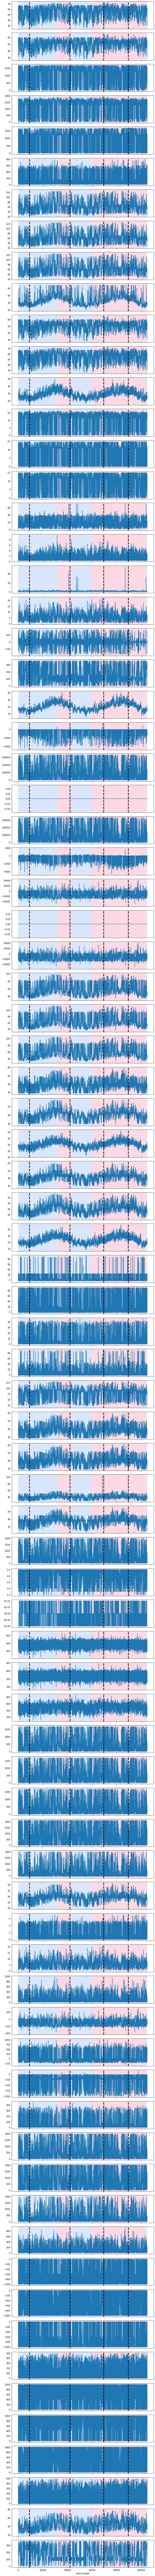

In [ ]:
point_length,dim,sigma = 104684,55,5

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=4,pen=np.log(point_length) * dim * sigma ** 2)

# display
rpt.display(signal, my_bkps, [144*63,144*291,144*482,144*621])
plt.xlabel("point_length")

###HYDRAULIC_GROUP錯誤預測

In [ ]:
signal = np.vstack([hyd_oil_temp_avg]).T

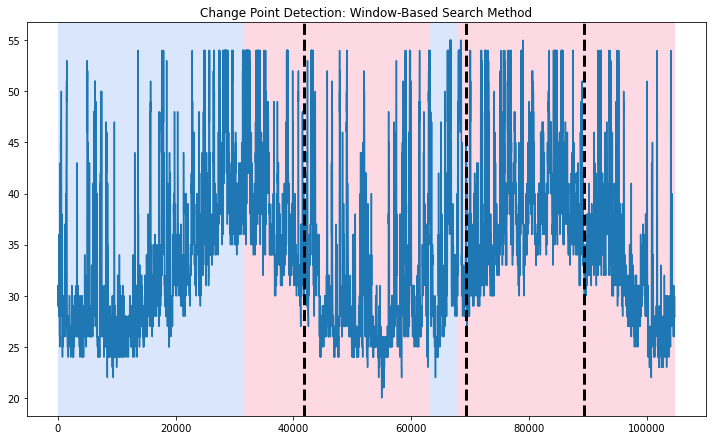

In [ ]:
model = "ar"  
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3,pen=np.log(point_length) * 1 * sigma ** 2)
rpt.show.display(signal, my_bkps,[144*291,144*482,144*621], figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

###genertator錯誤預測

In [ ]:
signal = np.vstack([gen_rpm_avg,gen_phase1_temp_avg,gen_phase2_temp_avg,gen_phase3_temp_avg,gen_bear2_temp_avg]).T

未移除可疑異常的區段（12小時）

Text(0.5, 68.99999999999991, 'point_length')

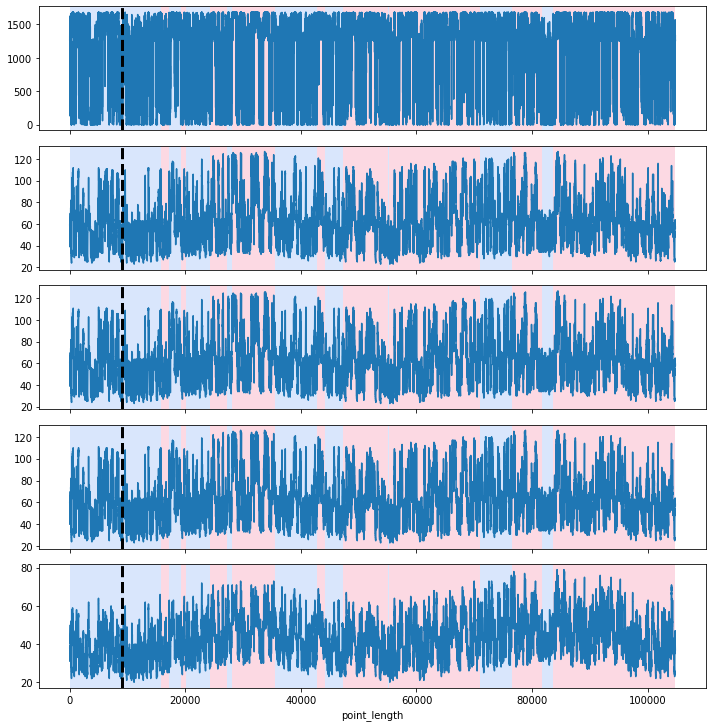

In [ ]:
point_length,dim,sigma = 104798,5,5

model = "l1"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=10, model=model).fit(signal)
my_bkps = algo.predict(pen=np.log(point_length) * dim * sigma**2)  

# display
rpt.display(signal, my_bkps, [144*63])
plt.xlabel("point_length")

移除可疑異常的區段（12小時）

In [ ]:
data11_part = pd.read_excel('./T11 問題部分移除.xlsx')

In [ ]:
gen_rpm_avg = np.array(data11_part['Gen_RPM_Avg'])
gen_phase1_temp_avg = np.array(data11_part['Gen_Phase1_Temp_Avg'])
gen_phase2_temp_avg = np.array(data11_part['Gen_Phase2_Temp_Avg'])
gen_phase3_temp_avg = np.array(data11_part['Gen_Phase3_Temp_Avg'])
gen_bear2_temp_avg = np.array(data11_part['Gen_Bear2_Temp_Avg'])

In [ ]:
signal = np.vstack([gen_rpm_avg,gen_phase1_temp_avg,gen_phase2_temp_avg,gen_phase3_temp_avg,gen_bear2_temp_avg]).T

Text(0.5, 68.99999999999991, 'point_length')

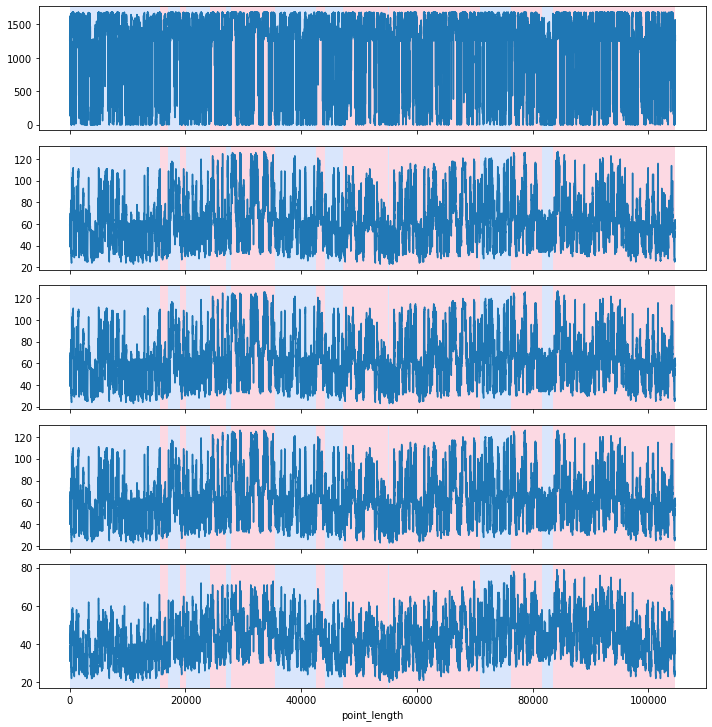

In [ ]:
point_length,dim,sigma = 104654,5,5

model = "l1"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=10, model=model).fit(signal)
my_bkps = algo.predict(pen=np.log(point_length) * dim * sigma**2)  

# display
rpt.display(signal, my_bkps)
plt.xlabel("point_length")

#### 特徵值

In [ ]:
sum=0
start=0
num=0
feature_avg_list = []
feature_avg = []
next=1

######Avg

In [ ]:
#平均值
for bkps in my_bkps:
  for next in range(start,bkps):
    num += 1
    next += 1
    sum += signal[start:next]
    start += 1
  feature_avg_list.append(sum/num)
  num=0
  sum=0
  next=1
feature_avg = np.array(feature_avg_list)
feature_avg = np.reshape(feature_avg,(5,20))
print(feature_avg)

[[1051.3963648    55.97557398   56.48271684   56.17404337   36.49515306
   803.46988764   47.0906367    47.70561798   47.51385768   33.76329588
  1471.73486553   75.43178484   75.76625917   75.39022005   44.70513447
   949.47928934   55.24568528   55.79390863   55.48730964   39.47817259]
 [1120.76034063   59.42554745   60.12238443   59.85158151   42.54501217
  1077.86849123   64.15333333   64.65719298   64.41333333   44.81368421
  1009.66184971   64.13410405   64.67514451   64.50404624   46.76069364
  1234.74449868   77.3055409    77.52348285   77.31609499   50.1146438 ]
 [ 991.88359833   58.21157601   58.79818689   58.58842399   41.85104603
  1411.44332155   79.53498233   79.76961131   79.52862191   48.58586572
  1063.19743265   56.19270998   56.82313788   56.50110935   37.2177496
  1187.62836129   60.09212903   60.652        60.31277419   39.35677419]
 [ 677.832        41.4          41.855        41.65         33.72
  1180.70154974   64.95165816   65.37831633   65.05070153   42.28973

##### MAX

In [ ]:
max=signal[0]
feature_max_list = []
feature_max = []

for bkps in my_bkps:
  for i in range(start,bkps):
    if(signal[i]>max):
      max = signal[i]
  feature_max_list.append(max)
  num=0
  sum=0
feature_max = np.array(feature_max_list)
feature_max = np.reshape(feature_max,(20,5))
print(feature_max)

[[1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]]


##### MIN

In [ ]:
min=signal[0]
feature_min_list = []
feature_min = []

for bkps in my_bkps:
  for i in range(start,bkps):
    if(signal[i]<min):
      min = signal[i]
  feature_min_list.append(min)
  num=0
  sum=0
feature_min = np.array(feature_min_list)
feature_min = np.reshape(feature_min,(20,5))
print(feature_min)

[[1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]
 [1270.9   59.    61.    60.    38. ]]


#####LinearRegression

斜率、截距

Ｘ為每時間段的五維數據

Ｙ為每個時間段

In [ ]:
start=0
slope = []
intercept = []
for bkps in my_bkps:
  X = np.vstack([gen_rpm_avg[start:bkps],gen_phase1_temp_avg[start:bkps],gen_phase2_temp_avg[start:bkps],gen_phase3_temp_avg[start:bkps],gen_bear2_temp_avg[start:bkps]]).T
  y = np.arange(start, bkps)
  start = bkps
  
  X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state=45)

  model = LinearRegression().fit(X_train, y_train)
  
  slope.append(model.coef_)#list
  intercept.append(model.intercept_)#list
  

[array([-4.94419882e-02, -4.38371578e+02,  4.35653876e+02, -3.44626098e+01,
        4.27920343e+01]), array([-4.15993745e-03, -1.23142072e+02,  1.30251695e+02, -3.45725593e+01,
        5.25170951e+01]), array([  0.56970357, -89.66085986,  72.72152204,  41.35924196,
       -78.55546726]), array([ -0.24643728,   5.47832167, -14.42530685,  25.96564218,
       -20.32606234]), array([ -0.28966745,   4.74327559,  -7.49110789, -46.07338833,
       111.56922631]), array([  -0.45217267,  -22.79473137,  115.41178093, -101.30793838,
         18.80106691]), array([ -0.04190019,  -2.04277253, -16.27967887,  22.76722978,
       -16.64609546]), array([   0.38703833,   76.9990101 , -188.17158271,   24.73421639,
        193.63979612]), array([   0.41191577,  120.72921481,  104.51177993, -168.53013116,
       -163.55040387]), array([ -0.25262438, -51.45925329,  70.13682492,   9.85679095,
       -87.3913935 ]), array([  -0.43513319,  312.44531308, -138.76124753, -175.49731549,
         12.61020089]), arr

In [ ]:
slope = np.array(slope)
intercept = np.array(intercept)

print(slope)#斜率，特徵係數
print(intercept)#截距

[[-4.94419882e-02 -4.38371578e+02  4.35653876e+02 -3.44626098e+01
   4.27920343e+01]
 [-4.15993745e-03 -1.23142072e+02  1.30251695e+02 -3.45725593e+01
   5.25170951e+01]
 [ 5.69703567e-01 -8.96608599e+01  7.27215220e+01  4.13592420e+01
  -7.85554673e+01]
 [-2.46437281e-01  5.47832167e+00 -1.44253069e+01  2.59656422e+01
  -2.03260623e+01]
 [-2.89667453e-01  4.74327559e+00 -7.49110789e+00 -4.60733883e+01
   1.11569226e+02]
 [-4.52172674e-01 -2.27947314e+01  1.15411781e+02 -1.01307938e+02
   1.88010669e+01]
 [-4.19001899e-02 -2.04277253e+00 -1.62796789e+01  2.27672298e+01
  -1.66460955e+01]
 [ 3.87038330e-01  7.69990101e+01 -1.88171583e+02  2.47342164e+01
   1.93639796e+02]
 [ 4.11915772e-01  1.20729215e+02  1.04511780e+02 -1.68530131e+02
  -1.63550404e+02]
 [-2.52624383e-01 -5.14592533e+01  7.01368249e+01  9.85679095e+00
  -8.73913935e+01]
 [-4.35133192e-01  3.12445313e+02 -1.38761248e+02 -1.75497315e+02
   1.26102009e+01]
 [ 5.77919223e-01 -6.04385940e+01  1.94570188e+02 -1.25067538e+02

## one class SVM

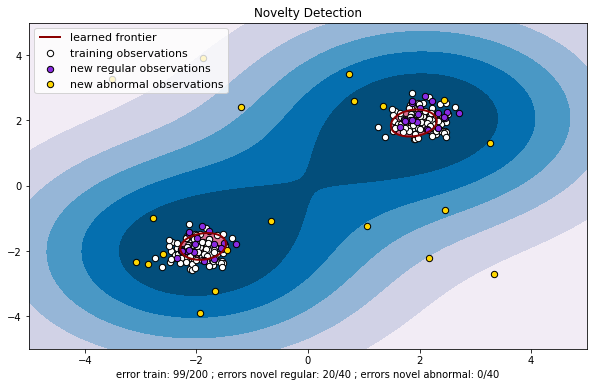

In [ ]:
import matplotlib.font_manager
from sklearn import svm

# Generate train/test/abnormal data
X = 0.3 * np.random.randn(100, 2) 
XX = 0.3 * np.random.randn(20, 2)
X_train = np.r_[X + 2, X - 2]
X_test = np.r_[XX + 2, XX - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))#產生浮點數

# fit the model
clf = svm.OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)
#nu =0.5，代表了：正常樣本卻誤判為異常的最多不超過 50% 
#gamma 代表了 RBF Kernel 將樣本投影到高維空間的縮放比例，gamma 值設定的越小代表樣本在高維空間的越分散，在訓練時的作用可能會造成準確率較低，但預測未知樣本的泛化能力強
clf.fit(X_train)
y_pred_train = clf.predict(X_train) # return 1,-1
y_pred_test = clf.predict(X_test)   # return 1,-1
y_pred_outliers = clf.predict(X_outliers)

# fp/fn
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size 


"""
Visualization of the result.
"""
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.title('Novelty Detection')
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)#外圍的擴展藍色區域
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')#左上角的文字方框
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')#紅線內的範圍

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ['learned frontier', 'training observations',
            'new regular observations', 'new abnormal observations'],
           loc='upper left',
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    'error train: %d/200 ; errors novel regular: %d/40 ; '
    'errors novel abnormal: %d/40'
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

predict_PB1

In [ ]:
from sklearn.model_selection import train_test_split
feature = predict_PB1
feature = np.reshape(feature, (52399, 2))

#normalizaion
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(-3,3) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( feature ) # Data 為原始資料

X_train, X_test= train_test_split(MinMax_Data, test_size=0.34, random_state=42)

clf = svm.OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)
#nu =0.5，代表了：正常樣本卻誤判為異常的最多不超過 50% 
#Kernel的手法只是將資料投到更高維度的空間
#gamma 代表了 RBF Kernel 將樣本投影到高維空間的縮放比例，gamma 值設定的越小代表樣本在高維空間的越分散，在訓練時的作用可能會造成準確率較低，但預測未知樣本的泛化能力強
clf.fit(X_train)
y_pred_train = clf.predict(X_train) # return 1,-1
y_pred_test = clf.predict(X_test)   # return 1,-1

n_error_train = y_pred_train[y_pred_train == -1].size # -1代表錯誤，這邊要看錯誤有多少個
n_error_test = y_pred_test[y_pred_test == -1].size

"""
Visualization of the result.
"""
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500)) #初始化生成網格點的橫縱座標矩陣

# plot the line, the points, and the nearest vectors to the plane
# decision_function呈現 OneClass SVM 所學習到的邊界
#（樣本經過RBF Kernel 函數的轉換，邊界的本質是一個超平面，投影到二維平面看起來像是一個圈圈）
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #np.c_垂直合併，#np.r_水平合併
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.title('Novelty Detection')
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)#level決定隔距和範圍大小，且只能increasing order
#linspace(start,stop,num)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')#界線
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')



#（白色為正常的訓練數據、紫色為正常的測試數據）
s = 20 # 點的大小
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
#[:, 0]代表取1D每行的第0個數據，[:, 1]代表取1D每行的第1個數據
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
#                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ['learned frontier', 'training observations',
            'new regular observations', 'new abnormal observations'],
           loc='upper left',
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    'error train: %d/69865 ; errors novel regular: %d/34932 ; '
    'errors novel abnormal: %d/?'
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

NameError: ignored

predict_RP1

In [ ]:
from sklearn.model_selection import train_test_split
feature = predict_RP1
feature = np.reshape(feature, (52399, 2))

#normalizaion
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(-2,2) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( feature ) # Data 為原始資料

X_train, X_test= train_test_split(MinMax_Data, test_size=0.34, random_state=42)

clf = svm.OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)
#nu =0.5，代表了：正常樣本卻誤判為異常的最多不超過 50% 
#Kernel的手法只是將資料投到更高維度的空間
#gamma 代表了 RBF Kernel 將樣本投影到高維空間的縮放比例，gamma 值設定的越小代表樣本在高維空間的越分散，在訓練時的作用可能會造成準確率較低，但預測未知樣本的泛化能力強
clf.fit(X_train)
y_pred_train = clf.predict(X_train) # return 1,-1
y_pred_test = clf.predict(X_test)   # return 1,-1

n_error_train = y_pred_train[y_pred_train == -1].size # -1代表錯誤，這邊要看錯誤有多少個
n_error_test = y_pred_test[y_pred_test == -1].size

"""
Visualization of the result.
"""
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500)) #初始化生成網格點的橫縱座標矩陣

# plot the line, the points, and the nearest vectors to the plane
# decision_function呈現 OneClass SVM 所學習到的邊界
#（樣本經過RBF Kernel 函數的轉換，邊界的本質是一個超平面，投影到二維平面看起來像是一個圈圈）
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #np.c_垂直合併，#np.r_水平合併
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.title('Novelty Detection')
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)#level決定隔距和範圍大小，且只能increasing order
#linspace(start,stop,num)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')#界線
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')



#（白色為正常的訓練數據、紫色為正常的測試數據）
s = 20 # 點的大小
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
#[:, 0]代表取1D每行的第0個數據，[:, 1]代表取1D每行的第1個數據
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
#                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ['learned frontier', 'training observations',
            'new regular observations', 'new abnormal observations'],
           loc='upper left',
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    'error train: %d/69865 ; errors novel regular: %d/34932 ; '
    'errors novel abnormal: %d/?'
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

predict_RP1, predict_PB1

In [ ]:
from sklearn.model_selection import train_test_split
feature = np.r_[predict_PB1,predict_RP1]
feature = np.reshape(feature, (104798, 2))

#normalizaion
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(-2,2) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( feature ) # Data 為原始資料

X_train, X_test= train_test_split(MinMax_Data, test_size=0.34, random_state=42)

clf = svm.OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)
#nu =0.5，代表了：正常樣本卻誤判為異常的最多不超過 50% 
#Kernel的手法只是將資料投到更高維度的空間
#gamma 代表了 RBF Kernel 將樣本投影到高維空間的縮放比例，gamma 值設定的越小代表樣本在高維空間的越分散，在訓練時的作用可能會造成準確率較低，但預測未知樣本的泛化能力強
clf.fit(X_train)
y_pred_train = clf.predict(X_train) # return 1,-1
y_pred_test = clf.predict(X_test)   # return 1,-1

n_error_train = y_pred_train[y_pred_train == -1].size # -1代表錯誤，這邊要看錯誤有多少個
n_error_test = y_pred_test[y_pred_test == -1].size

"""
Visualization of the result.
"""
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500)) #初始化生成網格點的橫縱座標矩陣

# plot the line, the points, and the nearest vectors to the plane
# decision_function呈現 OneClass SVM 所學習到的邊界
#（樣本經過RBF Kernel 函數的轉換，邊界的本質是一個超平面，投影到二維平面看起來像是一個圈圈）
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #np.c_垂直合併，#np.r_水平合併
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.title('Novelty Detection')
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)#level決定隔距和範圍大小，且只能increasing order
#linspace(start,stop,num)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')#界線
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')



#（白色為正常的訓練數據、紫色為正常的測試數據）
s = 20 # 點的大小
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
#[:, 0]代表取1D每行的第0個數據，[:, 1]代表取1D每行的第1個數據
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
#                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ['learned frontier', 'training observations',
            'new regular observations', 'new abnormal observations'],
           loc='upper left',
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    'error train: %d/69865 ; errors novel regular: %d/34932 ; '
    'errors novel abnormal: %d/?'
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

feature_min,feature_max

In [ ]:
from sklearn.model_selection import train_test_split
feature = np.r_[feature_min,feature_max]
feature = np.reshape(feature, (105, 2))

#normalizaion
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(-2,2) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( feature ) # Data 為原始資料

X_train, X_test= train_test_split(MinMax_Data, test_size=0.34, random_state=42)

clf = svm.OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)
#nu =0.5，代表了：正常樣本卻誤判為異常的最多不超過 50% 
#Kernel的手法只是將資料投到更高維度的空間
#gamma 代表了 RBF Kernel 將樣本投影到高維空間的縮放比例，gamma 值設定的越小代表樣本在高維空間的越分散，在訓練時的作用可能會造成準確率較低，但預測未知樣本的泛化能力強
clf.fit(X_train)
y_pred_train = clf.predict(X_train) # return 1,-1
y_pred_test = clf.predict(X_test)   # return 1,-1

n_error_train = y_pred_train[y_pred_train == -1].size # -1代表錯誤，這邊要看錯誤有多少個
n_error_test = y_pred_test[y_pred_test == -1].size

"""
Visualization of the result.
"""
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500)) #初始化生成網格點的橫縱座標矩陣

# plot the line, the points, and the nearest vectors to the plane
# decision_function呈現 OneClass SVM 所學習到的邊界
#（樣本經過RBF Kernel 函數的轉換，邊界的本質是一個超平面，投影到二維平面看起來像是一個圈圈）
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #np.c_垂直合併，#np.r_水平合併
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.title('Novelty Detection')
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)#level決定隔距和範圍大小，且只能increasing order
#linspace(start,stop,num)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')#界線
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')



#（白色為正常的訓練數據、紫色為正常的測試數據）
s = 20 # 點的大小
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
#[:, 0]代表取1D每行的第0個數據，[:, 1]代表取1D每行的第1個數據
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
#                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ['learned frontier', 'training observations',
            'new regular observations', 'new abnormal observations'],
           loc='upper left',
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    'error train: %d/140 ; errors novel regular: %d/70 ; '
    'errors novel abnormal: %d/?'
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [ ]:
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')

In [ ]:
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')

In [ ]:
X_train[:, 0], X_train[:, 1]

In [ ]:
X_test[:, 0], X_test[:, 1]

In [ ]:
X = 0.3 * np.random.randn(100, 2) 
XX = 0.3 * np.random.randn(20, 2)
X_train = np.r_[X + 2, X - 2]
X_test = np.r_[XX + 2, XX - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
print (X_outliers)

In [ ]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)

In [ ]:
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

In [ ]:
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

In [ ]:
plt.xlim((-5, 5))
plt.ylim((-5, 5))

In [ ]:
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')


In [ ]:
plt.legend([a.collections[0], b1, b2, c],
           ['learned frontier', 'training observations',
            'new regular observations', 'new abnormal observations'],
           loc='upper left',
           prop=matplotlib.font_manager.FontProperties(size=11))

#參考

In [ ]:
sum=0
start=0
num=0
feature_avg_list = []
feature_avg = []
next=1
#平均值
for bkps in my_bkps:
  for count in range(10):
    count+=1
    end = int(bkps*count/10)
    if(end<start):
      end = start+int((bkps-start)/10)
    for next in range(start,end):
      num += 1
      next += 1
      sum += signal[start:next]
      start += 1
    feature_avg_list.append(sum/num)
    num=0
    sum=0
    next=1
    count=0
feature_avg = np.array(feature_avg_list)
feature_avg = np.reshape(feature_avg,(20,50))#feature_avg[0]是藍色第一段分成十段的平均值
print(feature_avg)
from sklearn.linear_model import LinearRegression
from sklearn import datasets

y=[]
X = feature_avg # features 分段平均值
for bkps in my_bkps:
  for num in range(10):
    num+=1
    y.append(bkps*num/10)
y = np.reshape(y,(20,10))
#print(X.shape)
#print(y.shape)
y = my_bkps
model = LinearRegression().fit(X, y)
print(model.coef_)#斜率，特徵係數
print(model.coef_.shape)
print(model.intercept_)#截距

In [ ]:
sum=0
start=0
num=0
feature_avg_list = []
feature_avg = []
next=1
i=0
#平均值
for bkps in my_bkps:
  for next in range(start,bkps):
    num += 1
    next += 1
    sum += signal[start:next]
    start += 1
  feature_avg_list.append(sum/num)
  feature_avg = np.array(feature_avg_list)
  feature_avg = np.reshape(feature_avg,(1,5))
  X = feature_avg # features 分段平均值
  y = [my_bkps[i]]  # 時間
  #print(X.shape)
  #print(len(y))
  print(X)
  print(y)
  model = LinearRegression().fit(X, y)
  print(model.coef_[0])#斜率
  print(model.intercept_)#截距
  feature_avg_list = []
  num=0
  sum=0
  next=1
  i+=1